# Housing Case Study

Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

In [2]:
data=pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
data.count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [6]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

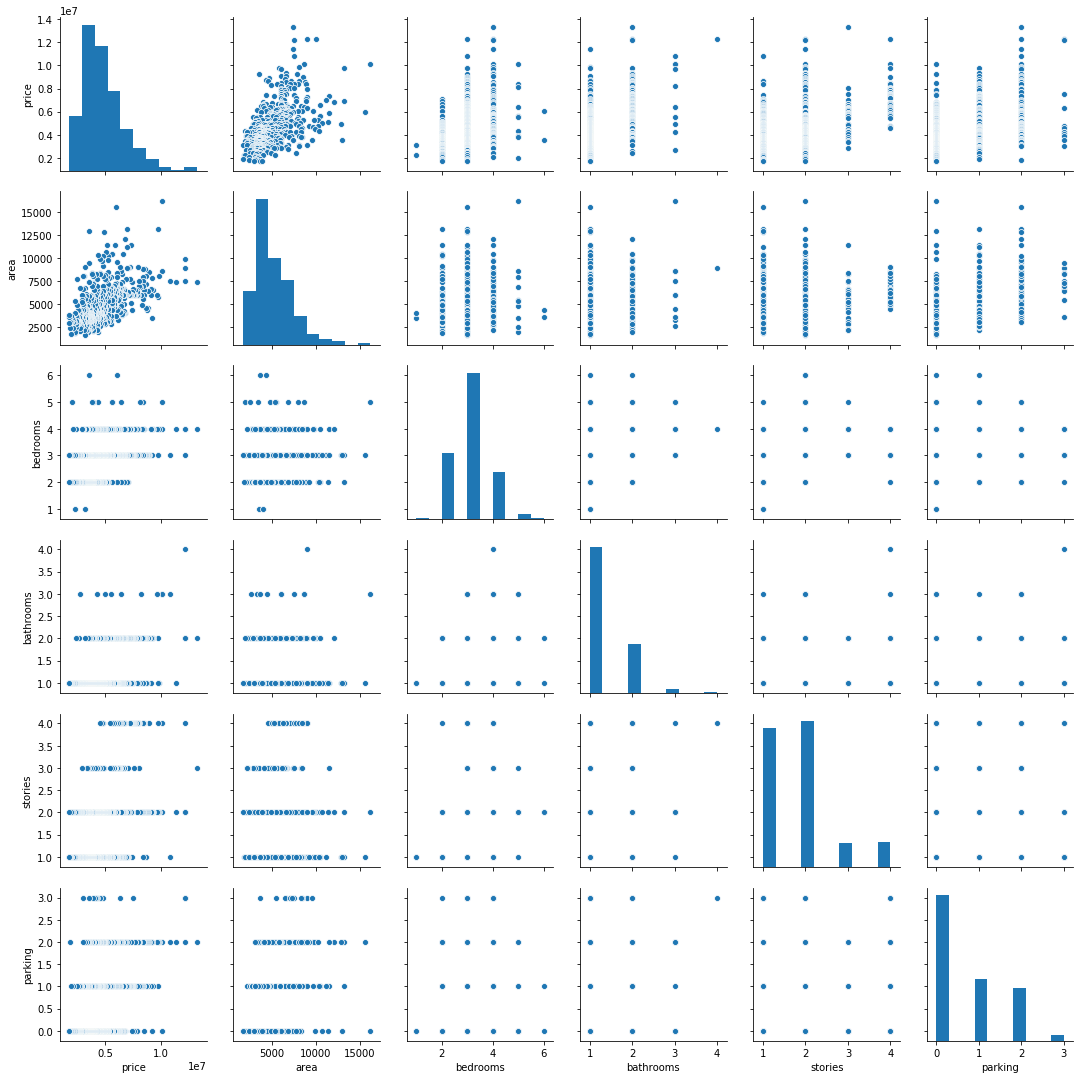

In [7]:
sns.pairplot(data)

In [8]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
data._get_numeric_data().columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [10]:
pd.options.display.max_rows=545

In [11]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


{'whiskers': [<matplotlib.lines.Line2D at 0x1efe5e53048>,
 'caps': [<matplotlib.lines.Line2D at 0x1efe5e53438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efe5e530b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1efe5e09518>],
 'fliers': [<matplotlib.lines.Line2D at 0x1efe5e09780>],
 'means': []}

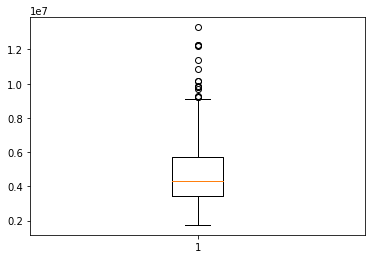

In [12]:
#checking out liers
plt.boxplot(data['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1efe63c9e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1efe63c5550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efe63c9a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1efe63c5be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1efe63c5f28>],
 'means': []}

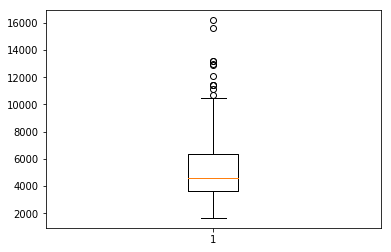

In [13]:
plt.boxplot(data['area'])

In [14]:
#outlayers treatment
percentiles = data['price'].quantile([0.1,0.9]).values
data['price']=data['price'].clip(percentiles[0],percentiles[1])
percentiles = data['area'].quantile([0.1,0.9]).values
data['area']=data['area'].clip(percentiles[0],percentiles[1])

{'whiskers': [<matplotlib.lines.Line2D at 0x1efe6458f28>,
 'caps': [<matplotlib.lines.Line2D at 0x1efe64635f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efe6458b38>],
 'medians': [<matplotlib.lines.Line2D at 0x1efe6463c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1efe6463fd0>],
 'means': []}

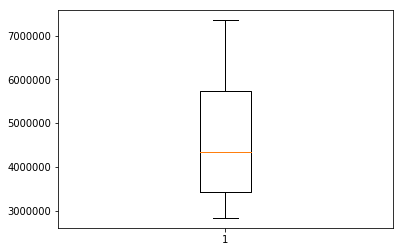

In [15]:
plt.boxplot(data['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1efe64b6518>,
 'caps': [<matplotlib.lines.Line2D at 0x1efe64b6ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efe64b6128>],
 'medians': [<matplotlib.lines.Line2D at 0x1efe64b6fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1efe64bf5c0>],
 'means': []}

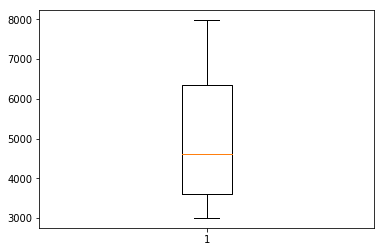

In [16]:
plt.boxplot(data['area'])

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


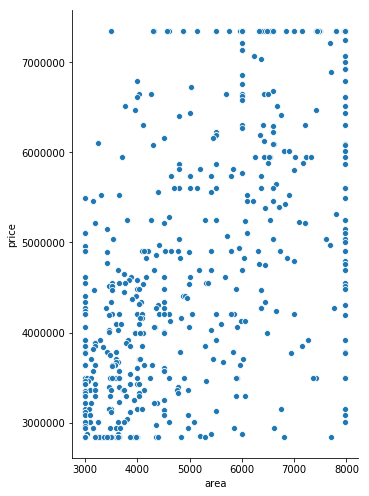

In [17]:
#to know the correlation
sns.pairplot(data ,x_vars=['area'], y_vars='price',size=7, aspect=0.7, kind='scatter')

In [18]:
# Converting Yes to 1 and No to 0
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0})
data['basement'] = data['basement'].map({'yes': 1, 'no': 0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0})
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})

In [19]:
# Now let's see the head
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7350000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,7350000,7980,4,4,4,1,0,0,0,1,3,0,furnished
2,7350000,7980,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7350000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7350000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [20]:
# Creating a dummy variable for 'furnishingstatus'
status = pd.get_dummies(data['furnishingstatus'])

In [21]:
#Adding the results to the master dataframe
status = pd.get_dummies(data['furnishingstatus'],drop_first=True)
data = pd.concat([data,status],axis=1)

In [22]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,7350000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,7350000,7980,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,7350000,7980,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,7350000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,7350000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [23]:
data=data.drop('furnishingstatus',axis=1)

In [24]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,7350000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,7350000,7980,4,4,4,1,0,0,0,1,3,0,0,0
2,7350000,7980,3,2,2,1,0,1,0,0,2,1,1,0
3,7350000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,7350000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [25]:
# Let us create the new metric and assign it to "areaperbedroom"
data['areaperbedroom'] = data['area']/data['bedrooms']

In [26]:
# Metric:bathrooms per bedroom
data['bbratio'] = data['bathrooms']/data['bedrooms']

In [27]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,7350000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,7350000,7980,4,4,4,1,0,0,0,1,3,0,0,0,1995.0,1.000000
2,7350000,7980,3,2,2,1,0,1,0,0,2,1,1,0,2660.0,0.666667
3,7350000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,7350000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [38]:
data1=data.copy()

In [41]:
data.to_csv('Preprocessed_housing.csv',index=False)

#data preparation

In [39]:
data1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,7350000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,7350000,7980,4,4,4,1,0,0,0,1,3,0,0,0,1995.0,1.000000
2,7350000,7980,3,2,2,1,0,1,0,0,2,1,1,0,2660.0,0.666667
3,7350000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,7350000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [40]:
# Putting feature variable to X
Y=data1['price']
del data1['price']
X=data1.copy()

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=100)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(436, 15)
(109, 15)
(436,)
(109,)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
Lr=LinearRegression()
model=Lr.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)

In [33]:
Lr.intercept_

1263186.8717875117

In [34]:
# Let's see the coefficient
coeff_df = pd.DataFrame(Lr.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
area,333.603777
bedrooms,-124308.387584
bathrooms,897191.805059
stories,354594.144559
mainroad,503008.785335
guestroom,295008.392089
basement,248174.397874
hotwaterheating,707138.233456
airconditioning,674235.888105
parking,112203.139597


In [35]:
r2_Score

0.7121167732105795

In [36]:
mse

626979035643.0793

In [42]:
#build model using stats model
import statsmodels.api as sm

In [44]:
#add constants to X_test,X_train
Xtr_sm=sm.add_constant(X_train)
Xte_sm=sm.add_constant(X_test)
model=sm.OLS(Y_train,Xtr_sm).fit()
Y_pred=model.predict(Xte_sm)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [45]:
print(r2_Score)
print(mse)
model.summary()

0.7121167732105809
626979035643.0764


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     65.22
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           1.50e-99
Time:                        14:48:46   Log-Likelihood:                -6541.1
No. Observations:                 436   AIC:                         1.311e+04
Df Residuals:                     420   BIC:                         1.318e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.263e+06   5.47e+05      2.308      0.022    1.87e+05    2.34e+06
area              333.6038     89.615      3.723      0.000     157.455     509.753
bedrooms        -1.243e+05   1.63e+05     -0.761      0.447   -4.45e+05    1.97e+05
bathrooms        8.972e+05   3.58e+05      2.505      0.013    1.93e+05     1.6e+06
stories          3.546e+05   5.44e+04      6.513      0.000    2.48e+05    4.62e+05
mainroad          5.03e+05   1.22e+05      4.110      0.000    2.62e+05    7.44e+05
guestroom         2.95e+05   1.15e+05      2.559      0.011    6.84e+04    5.22e+05
basement         2.482e+05   9.34e+04      2.659      0.008    6.47e+04    4.32e+05
hotwaterheating  7.071e+05   1.75e+05      4.052      0.000    3.64e+05    1.05e+06
airconditioning  6.742e+05   9.33e+04      7.225      0.000    4.91e+05    8.58e+05
parking          1.122e+05   4.97e+04      2.258      0.024    1.45e+04     2.1e+05
prefarea         4.211e+05   9.85e+04      4.273      0.000    2.27e+05    6.15e+05
semi-furnished  -6.094e+04   9.91e+04     -0.615      0.539   -2.56e+05    1.34e+05
unfurnished     -3.666e+05   1.06e+05     -3.469      0.001   -5.74e+05   -1.59e+05
areaperbedroom   -206.0627    235.003     -0.877      0.381    -667.992     255.867
bbratio         -3.823e+05    1.1e+06     -0.348      0.728   -2.54e+06    1.77e+06
==============================================================================
Omnibus:                        8.422   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                9.986
Skew:                           0.218   Prob(JB):                      0.00678
Kurtosis:                       3.600   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
#remove high p value features
del Xtr_sm['bbratio']
del Xte_sm['bbratio']

In [47]:
model=sm.OLS(Y_train,Xtr_sm).fit()
Y_pred=model.predict(Xte_sm)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
print(r2_Score)
print(mse)
model.summary()

0.7127933079493176
625505614968.997


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     70.01
Date:                Wed, 10 Jun 2020   Prob (F-statistic):          1.87e-100
Time:                        14:51:37   Log-Likelihood:                -6541.2
No. Observations:                 436   AIC:                         1.311e+04
Df Residuals:                     421   BIC:                         1.317e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.147e+06   4.35e+05      2.640      0.009    2.93e+05       2e+06
area              349.0642     77.780      4.488      0.000     196.178     501.950
bedrooms        -9.053e+04   1.31e+05     -0.690      0.491   -3.49e+05    1.67e+05
bathrooms        7.762e+05   8.79e+04      8.831      0.000    6.03e+05    9.49e+05
stories          3.531e+05   5.42e+04      6.512      0.000    2.47e+05     4.6e+05
mainroad         5.042e+05   1.22e+05      4.125      0.000    2.64e+05    7.44e+05
guestroom        2.908e+05   1.15e+05      2.540      0.011    6.57e+04    5.16e+05
basement         2.463e+05   9.31e+04      2.646      0.008    6.33e+04    4.29e+05
hotwaterheating  7.111e+05   1.74e+05      4.087      0.000    3.69e+05    1.05e+06
airconditioning  6.738e+05   9.32e+04      7.229      0.000    4.91e+05    8.57e+05
parking           1.12e+05   4.96e+04      2.256      0.025    1.44e+04     2.1e+05
prefarea         4.222e+05   9.84e+04      4.290      0.000    2.29e+05    6.16e+05
semi-furnished  -6.085e+04    9.9e+04     -0.615      0.539   -2.55e+05    1.34e+05
unfurnished     -3.671e+05   1.06e+05     -3.477      0.001   -5.75e+05    -1.6e+05
areaperbedroom   -247.5915    202.333     -1.224      0.222    -645.300     150.117
==============================================================================
Omnibus:                        8.564   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               10.165
Skew:                           0.221   Prob(JB):                      0.00620
Kurtosis:                       3.604   Cond. No.                     6.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
del Xtr_sm['semi-furnished']
del Xte_sm['semi-furnished']

In [49]:
model=sm.OLS(Y_train,Xtr_sm).fit()
Y_pred=model.predict(Xte_sm)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
print(r2_Score)
print(mse)
model.summary()

0.7148166923099031
621098899130.4839


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     75.48
Date:                Wed, 10 Jun 2020   Prob (F-statistic):          2.54e-101
Time:                        14:53:10   Log-Likelihood:                -6541.4
No. Observations:                 436   AIC:                         1.311e+04
Df Residuals:                     422   BIC:                         1.317e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.081e+06   4.21e+05      2.570      0.011    2.54e+05    1.91e+06
area              347.0080     77.651      4.469      0.000     194.377     499.639
bedrooms        -8.556e+04   1.31e+05     -0.653      0.514   -3.43e+05    1.72e+05
bathrooms        7.768e+05   8.78e+04      8.845      0.000    6.04e+05    9.49e+05
stories          3.542e+05   5.41e+04      6.541      0.000    2.48e+05    4.61e+05
mainroad         5.067e+05   1.22e+05      4.151      0.000    2.67e+05    7.47e+05
guestroom        2.919e+05   1.14e+05      2.551      0.011     6.7e+04    5.17e+05
basement         2.461e+05    9.3e+04      2.645      0.008    6.32e+04    4.29e+05
hotwaterheating  7.083e+05   1.74e+05      4.076      0.000    3.67e+05    1.05e+06
airconditioning  6.797e+05   9.27e+04      7.335      0.000    4.98e+05    8.62e+05
parking          1.121e+05   4.96e+04      2.260      0.024    1.46e+04     2.1e+05
prefarea         4.235e+05   9.83e+04      4.308      0.000     2.3e+05    6.17e+05
unfurnished     -3.283e+05   8.46e+04     -3.882      0.000   -4.95e+05   -1.62e+05
areaperbedroom   -237.9217    201.572     -1.180      0.239    -634.131     158.288
==============================================================================
Omnibus:                        8.314   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                9.786
Skew:                           0.218   Prob(JB):                      0.00750
Kurtosis:                       3.590   Cond. No.                     6.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
del Xtr_sm['bedrooms']
del Xte_sm['bedrooms']

In [51]:
model=sm.OLS(Y_train,Xtr_sm).fit()
Y_pred=model.predict(Xte_sm)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
print(r2_Score)
print(mse)
model.summary()

0.7168327704067473
616708095556.9742


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     81.85
Date:                Wed, 10 Jun 2020   Prob (F-statistic):          3.39e-102
Time:                        14:54:16   Log-Likelihood:                -6541.6
No. Observations:                 436   AIC:                         1.311e+04
Df Residuals:                     423   BIC:                         1.316e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            8.366e+05   1.93e+05      4.340      0.000    4.58e+05    1.22e+06
area              304.7904     43.053      7.079      0.000     220.166     389.415
bathrooms        7.705e+05   8.72e+04      8.832      0.000    5.99e+05    9.42e+05
stories          3.533e+05   5.41e+04      6.531      0.000    2.47e+05     4.6e+05
mainroad         5.098e+05   1.22e+05      4.183      0.000     2.7e+05    7.49e+05
guestroom        2.999e+05   1.14e+05      2.637      0.009    7.64e+04    5.23e+05
basement          2.44e+05   9.29e+04      2.626      0.009    6.14e+04    4.27e+05
hotwaterheating  7.071e+05   1.74e+05      4.072      0.000    3.66e+05    1.05e+06
airconditioning  6.818e+05   9.25e+04      7.367      0.000       5e+05    8.64e+05
parking          1.128e+05   4.96e+04      2.277      0.023    1.54e+04     2.1e+05
prefarea         4.307e+05   9.76e+04      4.412      0.000    2.39e+05    6.23e+05
unfurnished     -3.266e+05   8.45e+04     -3.866      0.000   -4.93e+05   -1.61e+05
areaperbedroom   -122.0490     95.804     -1.274      0.203    -310.360      66.262
==============================================================================
Omnibus:                        8.054   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                9.394
Skew:                           0.215   Prob(JB):                      0.00912
Kurtosis:                       3.576   Cond. No.                     3.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
del Xtr_sm['areaperbedroom']
del Xte_sm['areaperbedroom']

In [53]:
model=sm.OLS(Y_train,Xtr_sm).fit()
Y_pred=model.predict(Xte_sm)
r2_Score=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
print(r2_Score)
print(mse)
model.summary()

0.7112400269431041
628888495723.1815


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     89.01
Date:                Wed, 10 Jun 2020   Prob (F-statistic):          7.82e-103
Time:                        14:55:35   Log-Likelihood:                -6542.4
No. Observations:                 436   AIC:                         1.311e+04
Df Residuals:                     424   BIC:                         1.316e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.498e+05    1.8e+05      4.155      0.000    3.95e+05     1.1e+06
area              262.6186     27.547      9.533      0.000     208.472     316.765
bathrooms         7.94e+05   8.53e+04      9.305      0.000    6.26e+05    9.62e+05
stories          3.803e+05   4.98e+04      7.637      0.000    2.82e+05    4.78e+05
mainroad         4.962e+05   1.22e+05      4.084      0.000    2.57e+05    7.35e+05
guestroom        3.042e+05   1.14e+05      2.675      0.008    8.06e+04    5.28e+05
basement         2.622e+05   9.19e+04      2.854      0.005    8.16e+04    4.43e+05
hotwaterheating  7.103e+05   1.74e+05      4.088      0.000    3.69e+05    1.05e+06
airconditioning  6.788e+05   9.26e+04      7.332      0.000    4.97e+05    8.61e+05
parking          1.201e+05   4.93e+04      2.438      0.015    2.33e+04    2.17e+05
prefarea         4.355e+05   9.76e+04      4.462      0.000    2.44e+05    6.27e+05
unfurnished     -3.293e+05   8.45e+04     -3.897      0.000   -4.95e+05   -1.63e+05
==============================================================================
Omnibus:                        8.779   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               10.242
Skew:                           0.233   Prob(JB):                      0.00597
Kurtosis:                       3.589   Cond. No.                     2.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Sales')

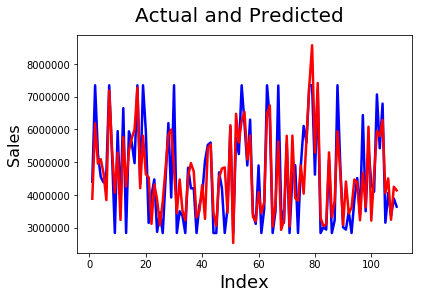

In [58]:
#Actual vs Predicted
c = [i for i in range(1,110,1)]
fig = plt.figure()
plt.plot(c,Y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)      

Text(0, 0.5, 'ytest-ypred')

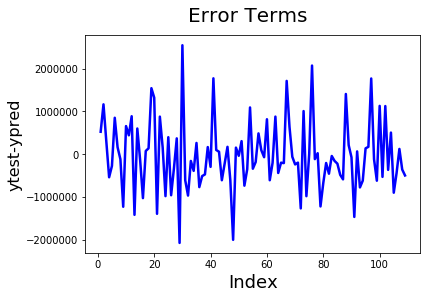

In [59]:
# Error terms
c = [i for i in range(1,110,1)]
fig = plt.figure()
plt.plot(c,Y_test-Y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label